In [1]:
pwd

'/mnt/pesaranlab/People/Capstone_students/Gino/Sleeping-Monkeys/ANNs_codes/CNNs'

In [2]:
import os
import sys
sys.path.append('../')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from torch.utils.data import Dataset, DataLoader
from torch import nn
from torch.nn.functional import relu
import torch.nn.functional as F
from scipy.io import loadmat
from skimage import io
from PIL import Image
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pickle

# import utils file
from Utils.utils_v2 import *


In [3]:
torch.cuda.empty_cache()

#### Goose 1st and 2nd series

In [4]:
val_dates = ['180409', '180412', '180414']
test_dates = ['180411', '180413']
bad_dates = []
load_path = '/home/bijanadmin/Desktop/Goose_data/data_Goose_all_2/'
# test_imbalance(load_path, val_dates, test_dates, bad_dates, test_train=True)

In [5]:
CH = 'all'
device = torch.device("cuda:1")
# device = torch.device('cuda')

# create train, validation, test data set
train_files, val_files, test_files = create_files(load_path, val_dates, test_dates, bad_dates)
# load data loaders 
train_loader, val_loader, test_loader = create_dataloaders(train_files, val_files, test_files, load_path, batch_size=128)

In [6]:
print(len(train_files), len(val_files), len(test_files))
train_files[0]

45880 6620 6134


['180324_003_62_time1036.0_sleep.npy', 1, 'sleep', '180324', '003', 1036.0]

In [7]:
# Check dimension of the data
# batch_idx, (data, label, date, rec, time) = next(iter(train_loader))
for batch_idx, (data, label, date, rec, time) in enumerate(train_loader): # check shapes
    print(data.shape)
    print(label.shape)
    print(len(date))
    print(len(rec))
    print(len(time))
    break

torch.Size([128, 62, 100, 10])
torch.Size([128, 1])
128
128
128


date:180330, rec:001, time:880.0, label:0.0


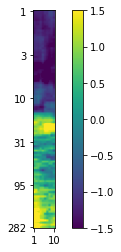

date:180329, rec:002, time:1576.0, label:1.0
date:180330, rec:001, time:7074.0, label:1.0
date:180325, rec:005, time:6633.0, label:1.0
date:180324, rec:001, time:650.0, label:0.0


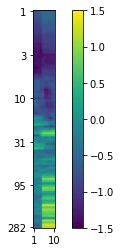

date:180325, rec:005, time:714.0, label:1.0
date:180323, rec:007, time:5661.0, label:0.0


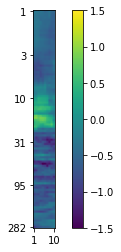

date:180326, rec:003, time:629.0, label:1.0
date:180331, rec:007, time:6258.0, label:0.0


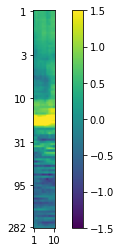

date:180327, rec:007, time:1320.0, label:0.0


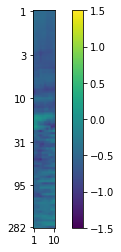

date:180325, rec:009, time:570.0, label:0.0


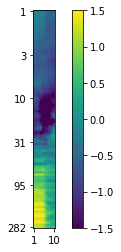

date:180331, rec:007, time:3997.0, label:0.0


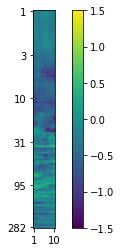

date:180324, rec:004, time:6933.0, label:1.0
date:180327, rec:007, time:1090.0, label:0.0


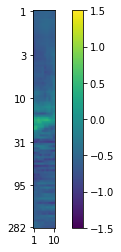

date:180410, rec:005, time:57.0, label:1.0
date:180329, rec:003, time:6436.0, label:1.0
date:180330, rec:008, time:6705.0, label:0.0


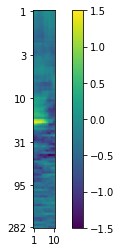

date:180323, rec:007, time:4832.0, label:0.0


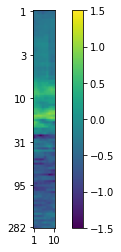

date:180330, rec:008, time:2606.0, label:0.0


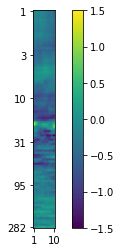

date:180324, rec:004, time:7137.0, label:1.0
date:180325, rec:009, time:1780.0, label:0.0


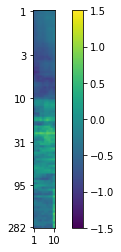

date:180410, rec:006, time:5642.0, label:0.0


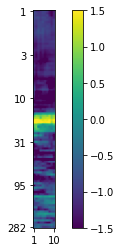

date:180324, rec:003, time:2169.0, label:1.0
date:180327, rec:002, time:2420.0, label:1.0
date:180330, rec:008, time:5785.0, label:0.0


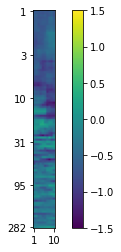

date:180327, rec:008, time:2862.0, label:0.0


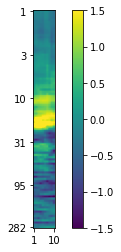

date:180401, rec:002, time:3506.0, label:1.0
date:180330, rec:006, time:1074.0, label:1.0
date:180330, rec:008, time:1731.0, label:0.0


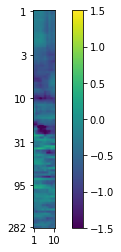

date:180330, rec:005, time:816.0, label:1.0
date:180323, rec:003, time:3882.0, label:1.0
date:180331, rec:005, time:4777.0, label:1.0
date:180327, rec:007, time:1820.0, label:0.0


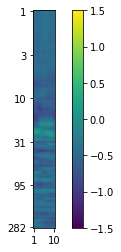

date:180327, rec:007, time:3970.0, label:0.0


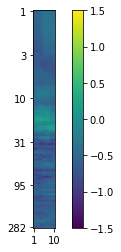

date:180330, rec:006, time:4612.0, label:1.0
date:180327, rec:008, time:4002.0, label:0.0


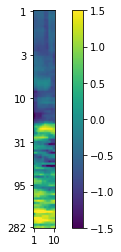

date:180330, rec:009, time:5521.0, label:0.0


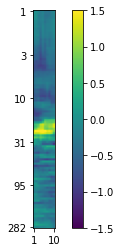

date:180327, rec:008, time:5513.0, label:0.0


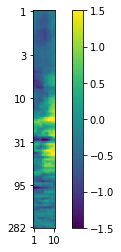

date:180330, rec:008, time:5955.0, label:0.0


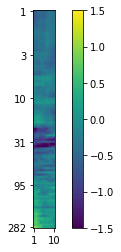

date:180324, rec:008, time:7064.0, label:0.0


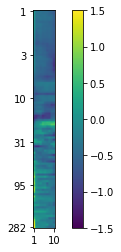

date:180330, rec:001, time:140.0, label:0.0


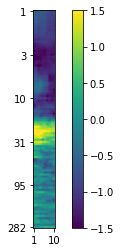

date:180327, rec:004, time:2384.0, label:0.0


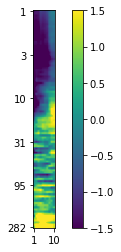

date:180326, rec:004, time:1899.0, label:1.0
date:180327, rec:002, time:814.0, label:1.0
date:180322, rec:003, time:2998.0, label:1.0
date:180322, rec:007, time:1707.0, label:0.0


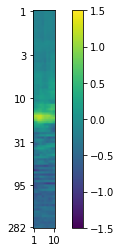

date:180327, rec:007, time:4891.0, label:0.0


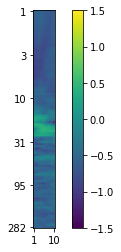

date:180330, rec:009, time:3430.0, label:0.0


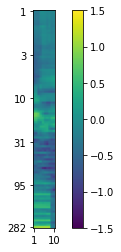

date:180401, rec:002, time:3616.0, label:1.0
date:180325, rec:007, time:1703.0, label:1.0
date:180327, rec:007, time:1250.0, label:0.0


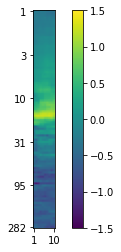

date:180327, rec:008, time:3082.0, label:0.0


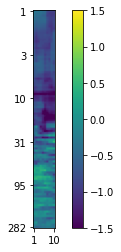

date:180330, rec:009, time:1434.0, label:0.0


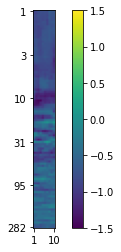

date:180330, rec:008, time:4767.0, label:0.0


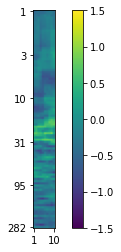

date:180329, rec:001, time:5609.0, label:1.0
date:180322, rec:002, time:4689.0, label:1.0
date:180323, rec:005, time:4168.0, label:1.0
date:180327, rec:008, time:2422.0, label:0.0


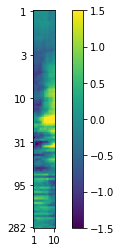

date:180322, rec:005, time:5884.0, label:1.0
date:180327, rec:002, time:3931.0, label:0.0


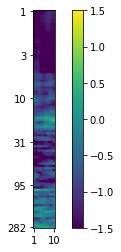

date:180331, rec:003, time:5008.0, label:1.0
date:180323, rec:007, time:4351.0, label:0.0


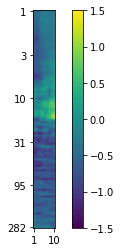

date:180330, rec:008, time:6935.0, label:0.0


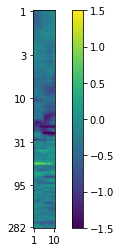

date:180331, rec:005, time:4057.0, label:0.0


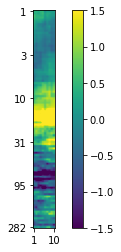

date:180322, rec:007, time:3990.0, label:0.0


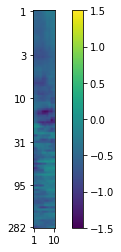

date:180329, rec:001, time:1310.0, label:0.0


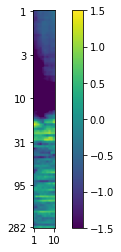

date:180331, rec:005, time:2847.0, label:1.0
date:180327, rec:007, time:4661.0, label:0.0


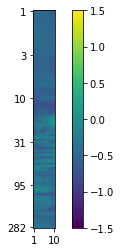

date:180330, rec:003, time:5022.0, label:1.0
date:180324, rec:006, time:3059.0, label:1.0
date:180325, rec:009, time:2390.0, label:0.0


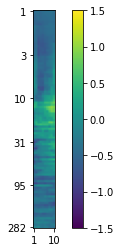

date:180329, rec:006, time:1744.0, label:1.0
date:180327, rec:007, time:3610.0, label:0.0


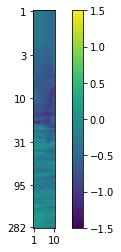

date:180325, rec:004, time:7140.0, label:1.0
date:180330, rec:009, time:5571.0, label:0.0


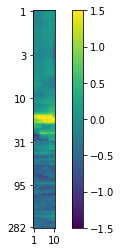

date:180325, rec:002, time:3919.0, label:0.0


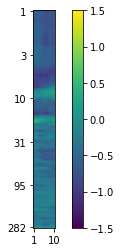

date:180329, rec:001, time:1510.0, label:0.0


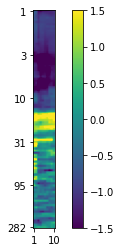

date:180330, rec:006, time:2321.0, label:1.0
date:180410, rec:004, time:5439.0, label:1.0
date:180327, rec:007, time:2180.0, label:0.0


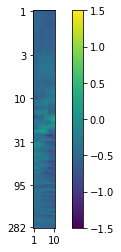

date:180325, rec:007, time:5603.0, label:0.0


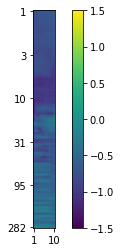

date:180327, rec:001, time:6215.0, label:1.0
date:180331, rec:007, time:5137.0, label:0.0


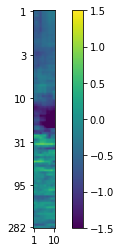

date:180327, rec:008, time:6589.0, label:1.0
date:180327, rec:007, time:5031.0, label:0.0


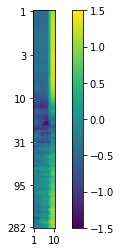

date:180325, rec:009, time:5089.0, label:0.0


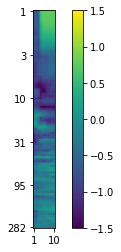

date:180327, rec:004, time:760.0, label:1.0
date:180325, rec:006, time:1578.0, label:1.0
date:180401, rec:001, time:7113.0, label:1.0
date:180329, rec:003, time:2344.0, label:1.0
date:180325, rec:006, time:7116.0, label:1.0
date:180322, rec:007, time:3569.0, label:0.0


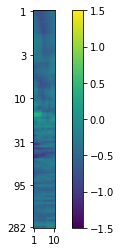

date:180329, rec:006, time:4647.0, label:0.0


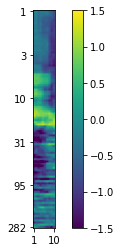

date:180331, rec:001, time:1770.0, label:0.0


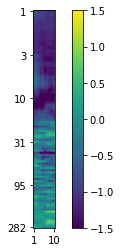

date:180330, rec:001, time:3502.0, label:1.0
date:180331, rec:007, time:6668.0, label:0.0


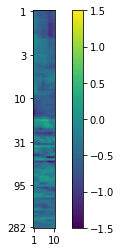

date:180329, rec:006, time:684.0, label:1.0
date:180327, rec:007, time:1370.0, label:0.0


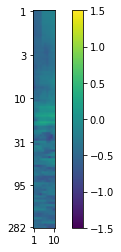

date:180330, rec:006, time:3708.0, label:1.0
date:180324, rec:009, time:460.0, label:0.0


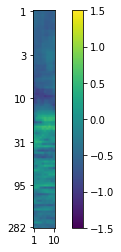

date:180324, rec:003, time:2339.0, label:1.0
date:180330, rec:009, time:438.0, label:0.0


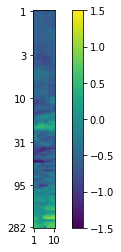

date:180327, rec:001, time:870.0, label:0.0


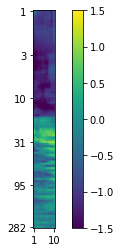

date:180330, rec:001, time:3757.0, label:1.0
date:180322, rec:003, time:1123.0, label:1.0
date:180325, rec:009, time:1310.0, label:0.0


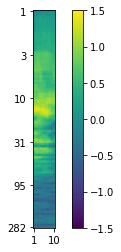

date:180410, rec:004, time:3310.0, label:1.0
date:180401, rec:001, time:1350.0, label:0.0


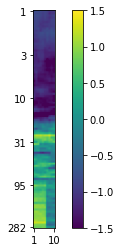

date:180330, rec:009, time:5341.0, label:0.0


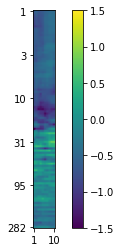

date:180327, rec:004, time:2584.0, label:0.0


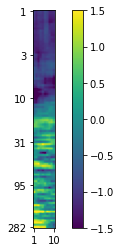

date:180325, rec:005, time:4196.0, label:0.0


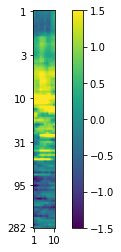

date:180410, rec:003, time:490.0, label:1.0
date:180331, rec:007, time:5428.0, label:0.0


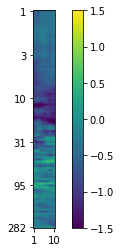

date:180324, rec:003, time:5067.0, label:1.0
date:180330, rec:009, time:5661.0, label:0.0


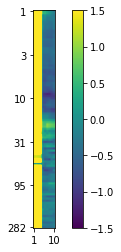

date:180401, rec:001, time:1030.0, label:0.0


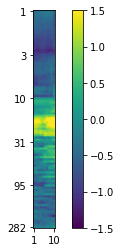

date:180326, rec:004, time:5586.0, label:1.0
date:180324, rec:003, time:1216.0, label:1.0
date:180329, rec:003, time:6296.0, label:1.0
date:180401, rec:001, time:1070.0, label:0.0


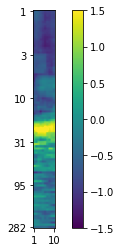

date:180322, rec:004, time:6023.0, label:1.0
date:180322, rec:007, time:3279.0, label:0.0


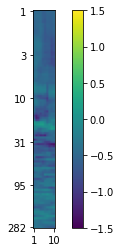

date:180327, rec:007, time:1260.0, label:0.0


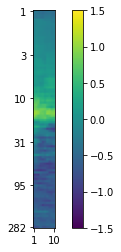

date:180330, rec:009, time:2084.0, label:0.0


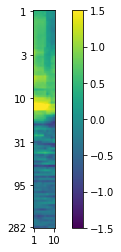

date:180330, rec:008, time:4757.0, label:0.0


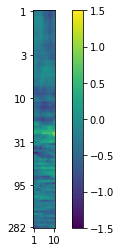

date:180410, rec:005, time:297.0, label:1.0
date:180327, rec:007, time:2520.0, label:0.0


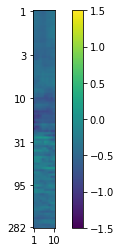

date:180327, rec:002, time:1840.0, label:1.0


In [8]:
# movement labelled 0; non-movement labelled 1
for batch_idx, (data, label, date, rec, time) in enumerate(train_loader):
    for i in range(128):
        print('date:{}, rec:{}, time:{}, label:{}'.format(date[i], rec[i], time[i], label[i][0].numpy()))
        if label[i][0].numpy() == 0.0:
            data_sub = data[i][0]
            plt.yticks(ticks=[0, 20, 40, 60, 80, 99], labels=[round(np.logspace(0, 2.45, 100)[i]) for i in [0, 20, 40, 60, 80, 99]])
            plt.xticks(ticks=[0, 9], labels=[1, 10])
            plt.imshow(data_sub)
            plt.clim(-1.5, 1.5)
            plt.colorbar()
            plt.show()
    break

## Convolutional Neural Network class

In [9]:
class CNN(nn.Module):
    def __init__(self,p_dropout):
        super(CNN,self).__init__()
    
        # convolutional layer (sees 1x100x10 image tensor)
        self.conv1 = nn.Conv2d(in_channels=62, out_channels=2,kernel_size=(3,3),stride=(1,1),padding=(1,1))
        # convolutional layer (sees 2x50x5 tensor)
        self.conv2 = nn.Conv2d(in_channels=2, out_channels=4,kernel_size=(3,3),stride=(1,1),padding=(1,1))
        # sees a layer 4x25x2
        self.fc1 = nn.Linear(4*25*2,1)
        
        # Max pooling
        self.pool = nn.MaxPool2d(2,2)
        # dropout layer 
        self.dropout = nn.Dropout(p_dropout)
         # batch normalization 
        self.bn1 = nn.BatchNorm2d(2)
        self.bn2 = nn.BatchNorm2d(4)
      
    def forward(self,x):
        
        x = x.float()
        
        conv_x1 = self.conv1(x)
        x = self.pool(F.relu(self.bn1(conv_x1))) # Convolution 1:

        conv_x2 = self.conv2(x)
        x = self.pool(F.relu(self.bn2(conv_x2))) # Convolution 2:

        x = x.view(x.shape[0],-1) # flatten image input
        
        x = self.dropout(x) # dropout
        x = self.fc1(x) # Fully connected layer
        
        return x, conv_x1, conv_x2  # return conv layers and output 

## set up the parameters 

In [10]:
learning_rate = 0.001
tol = 0.01
p_dropout = 0.4

num_epochs = 51
model_name = 'CNN'
model_type = 'LR'
alpha = 0
loss_type = 'bce'
reg_type = 'none'
series = '1st_and_2nd'

device = torch.device("cuda:1")

model = CNN(p_dropout).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)
criterion = nn.BCELoss(reduction='mean')
model

CNN(
  (conv1): Conv2d(62, 2, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(2, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=200, out_features=1, bias=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout): Dropout(p=0.4, inplace=False)
  (bn1): BatchNorm2d(2, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn2): BatchNorm2d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)

### test output

In [11]:
(data, labels, _, _, _) = next(iter(train_loader))
data = data.to(device)
output, conv1, conv2 = model(data)
output

tensor([[-0.8427],
        [-0.3536],
        [ 0.3192],
        [-0.2655],
        [-0.8016],
        [ 1.3274],
        [ 0.4616],
        [-0.9785],
        [ 0.3609],
        [-0.4205],
        [-0.9413],
        [-0.2424],
        [ 0.2839],
        [-0.1167],
        [ 0.2975],
        [-0.5861],
        [-0.8477],
        [-0.6110],
        [-0.7127],
        [-0.0917],
        [-0.1837],
        [-0.5372],
        [ 0.0298],
        [-0.3042],
        [ 0.5933],
        [ 1.4845],
        [-0.7766],
        [ 1.7034],
        [-0.5974],
        [-1.2830],
        [-0.0109],
        [-1.3811],
        [-0.8632],
        [-0.3429],
        [-0.7471],
        [ 0.3986],
        [-0.4908],
        [-0.4609],
        [-0.0338],
        [-0.7392],
        [-1.2203],
        [-0.4584],
        [-0.2792],
        [-0.1663],
        [ 0.6211],
        [ 0.1025],
        [-0.8409],
        [-1.1589],
        [-0.4688],
        [-0.4443],
        [-0.8937],
        [ 0.7844],
        [-1.

### Training and validation

In [9]:
epochs, training_losses, training_acc, val_losses, validation_acc = [], [], [], [], []

for epoch in range(num_epochs): 
    # call training function 
    train_loss, train_acc, conv1, conv2 = train(model, optimizer, criterion, train_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Train loss for epoch {}: {}'.format(epoch, train_loss))
    # call evaluation function 
    val_loss, val_acc = evaluate(model, optimizer, criterion, val_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Val loss for epoch {}: {}'.format(epoch, val_loss))
    # append losses 
    epochs.append(epoch)
    training_losses.append(train_loss)
    training_acc.append(train_acc)
    val_losses.append(val_loss)
    validation_acc.append(val_acc)
    # print the model everytime it performs better 
    if val_loss <= min(val_losses):
        best_epoch = epoch
        print(epoch)
        path = '/home/bijanadmin/Desktop/Goose_data/model/CNN_10_sec_window'
        torch.save(model.state_dict(), '{}/CNN_CH{}_LOSS{}_DROPOUT{}{}_EPOCH{}_MODEL_{}_SERIES_{}.pt'.format(path, CH, loss_type, p_dropout, alpha, epoch,model_name,series))
        torch.save(conv1,'{}/conv_layer_1_CH{}_LOSS{}_DROPOUT{}{}_EPOCH{}_MODEL_{}_SERIES_{}.pt'.format(path, CH, loss_type, p_dropout, alpha, epoch,model_name,series))
        torch.save(conv2,'{}/conv_layer_2_CH{}_LOSS{}_DROPOUT{}{}_EPOCH{}_MODEL_{}_SERIES_{}.pt'.format(path, CH, loss_type, p_dropout, alpha, epoch,model_name,series))
        

Train loss for epoch 0: 0.002567408373579383
Val loss for epoch 0: 0.002008569659665227
0
Train loss for epoch 1: 0.0019467291422188282
Val loss for epoch 1: 0.001759986625984311
1
Train loss for epoch 2: 0.0018003402510657907
Val loss for epoch 2: 0.0022973346058279276
Train loss for epoch 3: 0.0017545841401442885
Val loss for epoch 3: 0.00174732378218323
3
Train loss for epoch 4: 0.00166805658955127
Val loss for epoch 4: 0.0015873063821345568
4
Train loss for epoch 5: 0.0015981524484232068
Val loss for epoch 5: 0.0016011673724278808
Train loss for epoch 6: 0.0015869070775806904
Val loss for epoch 6: 0.0014685491332784295
6
Train loss for epoch 7: 0.0015246064867824316
Val loss for epoch 7: 0.0015861635329201818
Train loss for epoch 8: 0.0014877008507028222
Val loss for epoch 8: 0.001445577945560217
8
Train loss for epoch 9: 0.0014656565617769957
Val loss for epoch 9: 0.001547123771160841
Train loss for epoch 10: 0.0014044319977983832
Val loss for epoch 10: 0.0017150671919807792
Train

### Load the model and the convolutional layers

In [16]:
print('{}/CNN_CH{}_LOSS{}_DROPOUT{}{}_EPOCH{}_MODEL_{}_SERIES_{}.pt'.format(path, CH, loss_type, p_dropout, alpha, epoch,model_name,series))

/home/bijanadmin/Desktop/Goose_data/model/CNN_10_sec_window/CNN_CHall_LOSSbce_DROPOUT0.40_EPOCH46_MODEL_CNN_SERIES_1st_and_2nd.pt


In [12]:
# load the best performing model
epoch = 8
path = '/home/bijanadmin/Desktop/Goose_data/model/CNN_10_sec_window'
# Model class must be defined somewhere
model = torch.load('{}/CNN_CH{}_LOSS{}_DROPOUT{}{}_EPOCH{}_MODEL_{}_SERIES_{}.pt'.format(path, CH, loss_type, p_dropout, alpha, epoch,model_name,series))
conv1 = torch.load('{}/conv_layer_1_CH{}_LOSS{}_DROPOUT{}{}_EPOCH{}_MODEL_{}_SERIES_{}.pt'.format(path, CH, loss_type, p_dropout, alpha, epoch,model_name,series))
conv2 = torch.load('{}/conv_layer_2_CH{}_LOSS{}_DROPOUT{}{}_EPOCH{}_MODEL_{}_SERIES_{}.pt'.format(path, CH, loss_type, p_dropout, alpha, epoch,model_name,series))

### Print/visualize CNN filtes

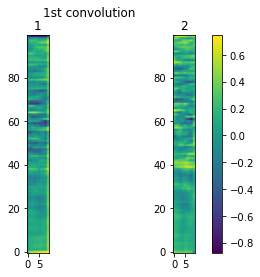

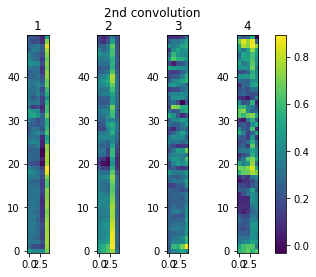

In [13]:
# =============================================================================
#  FILTERS CNN
# =============================================================================
path_fig = '/home/bijanadmin/Desktop/Goose_data/figures/CNN_10_sec_window'

# 1st level
fig, axes = plt.subplots(1, 2)
fig.suptitle('1st convolution')
for i, ax in enumerate(axes.flat):
    img = ax.imshow(torch.detach(conv1[2,i,:,:]).cpu().numpy(),origin='lower')
    ax.set_title('{}'.format(i+1))
plt.colorbar(img, ax=axes.ravel().tolist())
plt.show()
fig.savefig('{}/1st_convolution_DROPOUT_{}_SERIES_{}.png'.format(path_fig,p_dropout,series))


# 2nd level 
fig, axes = plt.subplots(1, 4)
fig.suptitle('2nd convolution')
for i, ax in enumerate(axes.flat):
    img = ax.imshow(torch.detach(conv2[2,i,:,:]).cpu().numpy(),origin='lower')
    ax.set_title('{}'.format(i+1))
plt.colorbar(img, ax=axes.ravel().tolist())
plt.show()
fig.savefig('{}/2nd_convolution_DROPOUT_{}_SERIES_{}.png'.format(path_fig,p_dropout,series))

In [14]:
def plot_loss_acc_2(training_losses, val_losses, training_acc, validation_acc, model_name):
    fig = plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    plt.title(model_name, fontsize = 15)
    plt.plot(training_losses, linewidth = 1.5, label = 'train')
    plt.plot(val_losses, linewidth = 1.5, label = 'valid')
    plt.xlabel("Epoch",fontsize = 15)
    plt.ylabel("Loss", fontsize = 15)
    plt.legend()
    plt.subplot(1,2,2)
    plt.title(model_name, fontsize = 15)
    plt.plot(training_acc, linewidth = 1.5, label = 'train')
    plt.plot(validation_acc, linewidth = 1.5, label = 'valid')
    plt.xlabel("Epoch",fontsize = 15)
    plt.ylabel("Accuracy", fontsize = 15)
    plt.legend()
    plt.show()
    return fig

In [48]:
fig = plot_loss_acc_2(training_losses, val_losses, training_acc, validation_acc, 'CNN dropout = 0.4') 

NameError: name 'training_losses' is not defined

In [16]:
path_fig = '/home/bijanadmin/Desktop/Goose_data/figures'
path_fig_model = '/CNN_10_sec_window'

fig.savefig(path_fig + path_fig_model + '/MODEL_{}_CH{}_LOSS{}_DROPOUT{}_EPOCH{}_SERIES_{}.png'.format(model_name,CH,loss_type,p_dropout,epoch,series))
plt.close(fig)

### Load best model and test the accuracy (train/validation)

In [31]:
epoch = 8
model = CNN(p_dropout).to(device)
model.load_state_dict(torch.load('{}/CNN_CH{}_LOSS{}_DROPOUT{}{}_EPOCH{}_MODEL_{}_SERIES_{}.pt'.format(path, CH, loss_type, p_dropout, alpha, epoch,model_name,series)))
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

loader = val_loader
train_loss, train_acc, train_preds, train_preds_probs, train_labels, _, _, _, cases_wrong_train = evaluate(model, optimizer, criterion, loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device)
print('train loss:{}, train accuracy:{}, train percentage postive:{}'.format(train_loss, train_acc, np.mean(np.concatenate(train_labels))))

train loss:0.001445577945560217, train accuracy:0.9277945619335347, train percentage postive:0.8261329531669617


### Plot confusion matrices (train/validation)

In [47]:
predictions_test = np.concatenate(train_preds)
labels_test = np.concatenate(train_labels)

cm_test = confusion_matrix(labels_test, predictions_test)
cm_test
cm_test.astype(np.float).sum(axis=1)

array([1151., 5469.])

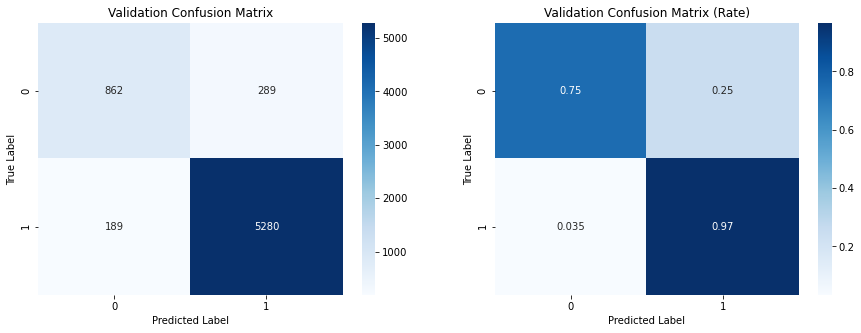

In [49]:
### Plot confusion matrices 
def plot_confusion(test_preds, test_labels,title):
    predictions_test = np.concatenate(test_preds) # all predicted labels
    labels_test = np.concatenate(test_labels) # all known labels

    # confusion matrix
    cm_test = confusion_matrix(labels_test, predictions_test)
    cm_test_percent = (cm_test.T/cm_test.astype(np.float).sum(axis=1)).T
    
    # make figure 
    fig = plt.figure(figsize=(15, 5))
    plt.subplot(1,2,1)
    sn.heatmap(cm_test, annot = True,  fmt = 'd', cmap='Blues')
    plt.title('{} Confusion Matrix'.format(title))
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.subplot(1,2,2)
    sn.heatmap(cm_test_percent, annot = True, cmap='Blues')
    plt.title('{} Confusion Matrix (Rate)'.format(title))
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()
    return fig

data_set = 'Validation'
path_fig = '/home/bijanadmin/Desktop/Goose_data/figures/CNN_10_sec_window'
fig = plot_confusion(train_preds, train_labels,data_set)
fig.savefig('{}/{}_confusion_matrix_CNN_CH_{}_DROPOUT_{}_EPOCH_{}_SERIES_{}.png'.format(path_fig,data_set,CH,p_dropout,epoch,series))